In [1]:
import numpy as np
import matplotlib.pyplot as plt
from supervised_experiment import ActionNet, MLPNet
from vi_lie import rodrigues
import torch
from lie_learn.groups.SO3 import change_coordinates as SO3_coordinates

In [2]:
action_net = ActionNet(6)
action_net.load_state_dict(torch.load('supervised_outputs/action.pickle'))
mlp_net = MLPNet(6)
mlp_net.load_state_dict(torch.load('supervised_outputs/mlp.pickle'))

In [12]:
start = torch.rand(3)[None] * 5
end = torch.rand(3)[None] * 5
t = torch.linspace(0, 1, 10)[:, None]
x = (1-t) * start + end * t
rot = rodrigues(x).detach()

action_outputs = action_net(rot)
mlp_outputs = mlp_net(rot)

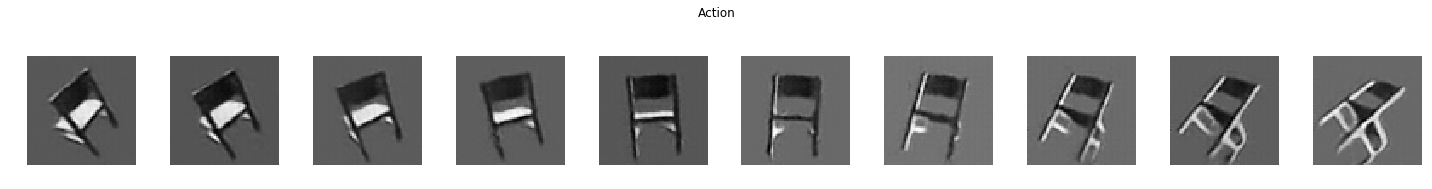

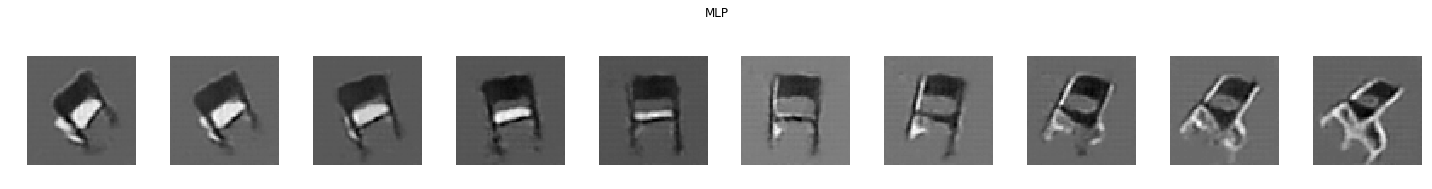

In [13]:
def plot_output(images, title=""):
    fig, ax = plt.subplots(1, 10, figsize=(20, 3))
    for ax, im in zip(ax.flatten(), images):
        ax.imshow(im.detach(), 'gray')
        ax.set_axis_off()
    fig.suptitle(title)
    fig.tight_layout()
plot_output(action_outputs, 'Action')
plot_output(mlp_outputs, 'MLP')